In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('ml-1m/users.dat', sep='::', header=None, names=unames, engine='python', encoding='ISO-8859-1')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ml-1m/ratings.dat', sep='::', header=None, names=rnames, engine='python', encoding='ISO-8859-1')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ml-1m/movies.dat', sep='::', header=None, names=mnames, engine='python', encoding='ISO-8859-1')

In [3]:
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [4]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
movies['year'] = movies['title'].str.extract('\((\d{4})\)', expand=False)
# movies['year'] = pd.to_numeric(movies['year'])
movies.head()

,movie_id,title,genres,year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [7]:
genres_list = []
for genres in movies['genres']:
    for genre in genres.split('|'):
        if genre not in genres_list:
            genres_list.append(genre)
print(genres_list, " | ", len(genres_list))

['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir', 'Western']  |  18


In [8]:
merged = pd.merge(pd.merge(users, ratings), movies)
merged.head()

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres,year
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,1975
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama,1975
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama,1975
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama,1975
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama,1975


QUESTION - 1:

An aggregate on the number of rating done for each particular genre.

In [10]:
genre_count = {}
for genre in genres_list:
    x = merged[merged["genres"].str.contains(genre)]
    genre_count[genre] = len(x)
genre_count_df = pd.DataFrame(genre_count.items(), columns=['Genre', 'Count'])
genre_count_df

,Genre,Count
0,Animation,43293
1,Children's,72186
2,Comedy,356580
3,Adventure,133953
4,Fantasy,36301
5,Romance,147523
6,Drama,354529
7,Action,257457
8,Crime,79541
9,Thriller,189680


In [11]:
# Male and Female reviews seperated.
genre_count = {}
for genre in genres_list:
    x = merged[merged["genres"].str.contains(genre)]
    genre_count[genre] = x['gender'].value_counts()
genre_count_df = pd.DataFrame.from_dict(genre_count)

QUESTION - 2: 

Top 5 ranked genres by women on most number of rating.

In [33]:
print("Top 5 Genres for Females: ")
genre_count_df.loc['F'].sort_values(ascending=False)[:5]

Top 5 Genres for Females: 


Drama       98153
Comedy      96271
Romance     50297
Action      45650
Thriller    40308
Name: F, dtype: int64

QUESTION - 3: 

Top 5 ranked genres by men on most number of rating.

In [14]:
print("Top 5 Genres for Males: ")
print(genre_count_df.loc['M'].sort_values(ascending=False)[:5])

Top 5 Genres for Males: 
Comedy      260309
Drama       256376
Action      211807
Thriller    149372
Sci-Fi      129894
Name: M, dtype: int64


QUESTION-4: 

Average movie's rating for Comedy genre in each era.

In [36]:
x = merged[merged['genres'].str.contains("Comedy")]
for era in ['197', '198', '199', '200']:
    rating_for_era = x[x['year'].str.contains(era)]
    print("Average rating for Comedy genre in the", int(era)*10, "s: ", rating_for_era['rating'].mean())

# INTERESTING OBSERVATION:
# No movies available past the year 2000. 
# So, the average rating for movies from 2000-2009 => average rating for movies released in the year 2000.

Average rating for Comedy genre in the 1970 s:  3.8852724872713558
Average rating for Comedy genre in the 1980 s:  3.574682872458999
Average rating for Comedy genre in the 1990 s:  3.404011899962749
Average rating for Comedy genre in the 2000 s:  3.400386722526587


QUESTION-5: 

Given a genre and a rating_range(i.e. [3.5, 4]), returns all the movies of that genre and within that rating range sorted by average rating.

In [34]:
def part5(genre, rating_range):
    x = merged[merged['genres'].str.contains(genre)]
    x = x[(x['rating'] >= rating_range[0]) & (x['rating'] <= rating_range[1])]
    ans = x.groupby('title').agg({'rating':[np.mean]}).sort_values(by=[('rating', 'mean')], ascending=False)
    return ans  

p5 = part5("Action", [2,4])
p5

,rating
,mean
title,
Target (1995),4.000000
Heaven's Burning (1997),4.000000
Condition Red (1995),4.000000
"Stranger, The (1994)",4.000000
Tokyo Fist (1995),4.000000
...,...
Turbo: A Power Rangers Movie (1997),2.272727
Best of the Best 3: No Turning Back (1995),2.222222


QUESTION-6: 

Presenting a plot using the dataset.

In [24]:
# Expanding upon the 4th question, we calculate average ratings all the genres over the eras and see how they 
# performed and how the people's movie tastes change.
plot_data = {}
for era in ['197', '198', '199', '200']:
    years = str(int(era)*10)+"s"
    x = merged[merged['year'].str.contains(era)]
    for genre in genres_list:
        temp = x[x['genres'].str.contains(genre)]
        if years not in plot_data:
            plot_data[years] = [temp['rating'].mean()]
        else:
            plot_data[years].append(temp['rating'].mean())

plot_data_df = pd.DataFrame(index=genres_list, data=plot_data)
plot_data_df.fillna(0, inplace=True)
print(plot_data_df)

                1970s     1980s     1990s     2000s
Animation    3.540103  3.591174  3.743986  3.388091
Children's   3.460241  3.455690  3.279811  3.284507
Comedy       3.885272  3.574683  3.404012  3.400387
Adventure    3.723703  3.599169  3.247514  3.066234
Fantasy      4.181633  3.543659  3.034932  2.414815
Romance      3.772608  3.660163  3.500348  3.216760
Drama        4.017184  3.791765  3.664912  3.625823
Action       3.824759  3.665287  3.307267  3.465275
Crime        4.233915  3.661715  3.620257  3.159375
Thriller     3.936182  3.666712  3.480683  3.235872
Horror       3.677649  3.128832  2.992083  2.876956
Sci-Fi       3.677091  3.620464  3.279957  3.145584
Documentary  3.625000  4.047778  3.933043  3.523697
War          4.051461  3.944061  3.681362  3.750955
Musical      3.495520  3.568041  3.463350  3.820000
Mystery      4.129243  3.500406  3.461807  2.733102
Film-Noir    4.339241  3.954225  3.873613  0.000000
Western      3.773097  3.375606  3.351640  0.000000


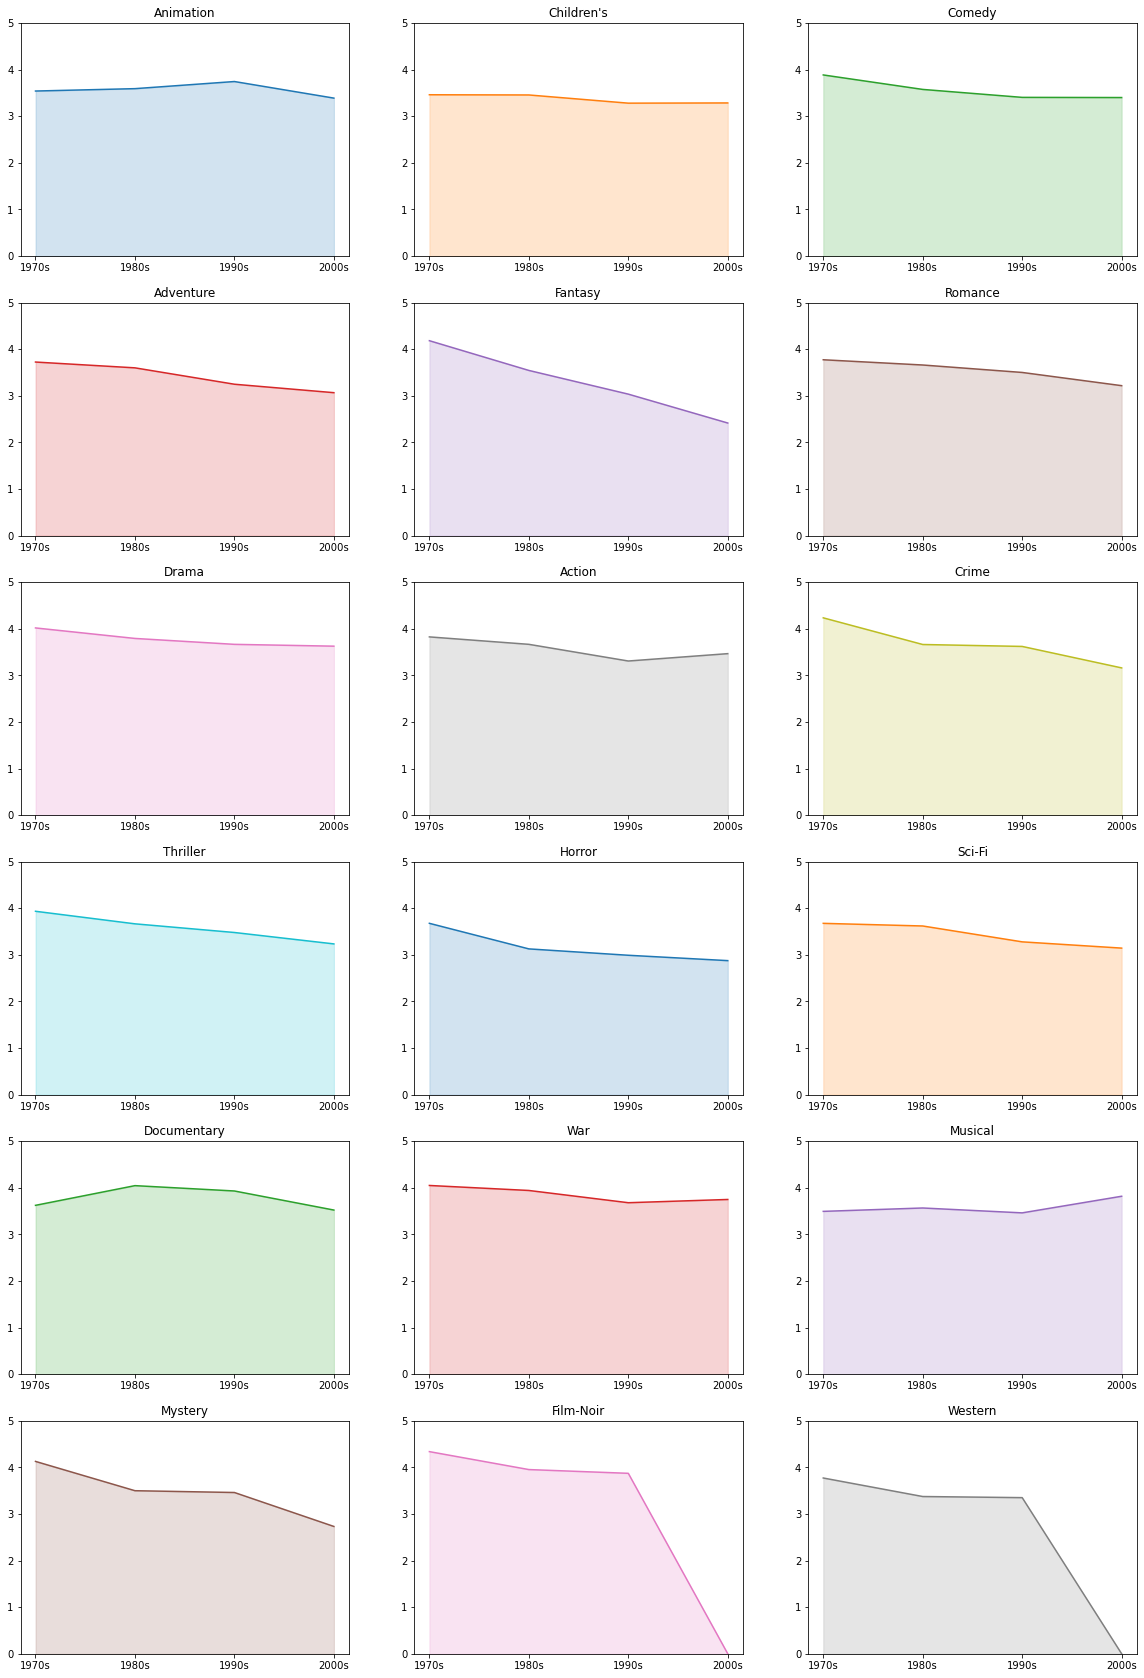

In [26]:
columns = ['1970s', '1980s', '1990s', '2000s']

fig = plt.figure(figsize=(20,30))
colors = plt.rcParams["axes.prop_cycle"]()

for i, (name, row) in enumerate(plot_data_df.iterrows()):
    ax = plt.subplot(6,3, i+1)
    c = next(colors)["color"]
    ax.set_title(name)
    ax.set_aspect('auto')
    ax.set_ylim([0.0, 5.00])
    ax.set_ybound(lower=0.0, upper=5.00)
    ax.fill_between(columns, row, alpha=0.2, color=c)
    ax.plot(columns, row, color=c)
plt.show()

Interesting OBSERVATION: 

As the eras progressed, the ratings of most of the genres has decreased. While some genres saw a more decrease than the others, some genres like Children's, Comedy, Action, and Musical saw an upward trend, making them better than ever before.
 
The reason for this upward trend in my opinion for these genres is because of the rise of animation studios like Pixar, rising popularity for situation comedy/sit-com, and the popularity of some movie franchises like Die Hard, Mission Impossible, and more.